 - Currently uses the radius-as-a-function-of-B-mag for Tycho stars from the BOSS mask (in every band) to set the `NEAR_RADIUS`: R = (0.0802B*B - 1.860B + 11.625) (see Eqn. 9 of https://arxiv.org/pdf/1203.6594.pdf) and half that radius to set the `IN_RADIUS`. We convert this from arcminutes to arcseconds.

In [1]:
import os
import sys
import time

In [2]:
import pandas as pd
import numpy as np
from numpy import cos
from scipy.spatial import cKDTree

In [3]:
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline
import skimage.io
import cv2

In [4]:
LSLGAdir = os.getenv('LSLGA_DIR')
parent = os.path.join(LSLGAdir, 'sample', 'hyperleda-d25min10.fits')
tycho2 = os.path.join(LSLGAdir, 'sample', 'tycho2.kd.fits')

In [5]:
galaxies = Table(fitsio.read(parent, ext=1)).to_pandas()
tycho = Table(fitsio.read(tycho2, ext=1)).to_pandas()

In [6]:
tycho = tycho[tycho.ISGALAXY == 0]
tycho['radius'] = (0.0802*(tycho.MAG_BT)**2 - 1.860*tycho.MAG_BT + 11.625)/60 # in arcsec

In [7]:
locations = np.array([galaxies.ra, galaxies.dec]).T
tree = cKDTree(locations[:1000000])

In [8]:
start_time = time.time()

nearby = []

for star in tycho.itertuples():

    near_list = tree.query_ball_point((star.RA, star.DEC), r=star.radius)
    
    if len(near_list) > 0:
        keep = galaxies.loc[galaxies.index[near_list]]
        nearby.append(keep.index)
    
    if star.Index%10000 == 0:
        sys.stdout.write('\r')
        sys.stdout.write('{0:.{1}f} percent complete'.format(star.Index/len(tycho)*100, 2))
        sys.stdout.flush()

tocut = []
for ii in range(len(nearby)):
    tocut.append(nearby[ii][0])

check = galaxies.loc[tocut]

print('\r')
print('{0:.{1}f} seconds'.format(time.time() - start_time, 2))

99.71 percent complete
43.06 seconds


In [13]:
check[1000:1050]

galaxy      pgc objtype          ra        dec  \
936816               b'PGC1178037'  1178037    b'G'  172.644385   0.880704   
933294  b'SDSSJ112913.88+003937.7'  4281802    b'g'  172.307877   0.660493   
932272  b'SDSSJ112851.50+004628.7'  4281505    b'g'  172.214628   0.774723   
931959               b'PGC1146991'  1146991    b'G'  172.184655  -0.291879   
922486               b'PGC1164487'  1164487    b'G'  171.210684   0.380676   
918145               b'PGC1158047'  1158047    b'g'  170.799128   0.137132   
916102               b'PGC1152896'  1152896    b'G'  170.603337  -0.061278   
915023  b'SDSSJ112159.84-002614.6'  4276261    b'g'  170.499168  -0.437314   
912844  b'SDSSJ112113.36+001018.2'  4275584    b'g'  170.305512   0.171738   
931506               b'PGC1168257'  1168257    b'g'  172.140295   0.525330   
929762  b'SDSSJ112752.33+012716.1'  4280731    b'g'  171.968045   1.454618   
916104               b'PGC1190269'  1190269    b'g'  170.603503   1.288992   
915301               b'PGC1175523'  1175523    b'G'  170.524455   0.789361   
913903               b'PGC1180014'  1180014    b'g'  170.402048   0.950713   
945425               b'PGC1204987'  1204987    b'g'  173.451255   1.760254   
934209               b'PGC1233903'  1233903    b'G'  172.394751   2.661507   
932413               b'PGC1207762'  1207762    b'G'  172.227421   1.844144   
932130               b'PGC3120588'  3120588    b'G'  172.201320   2.145085   
931624               b'PGC1208497'  1208497    b'g'  172.151221   1.867824   
929905               b'PGC3287711'  3287711    b'G'  171.982062   1.838220   
947104               b'PGC1243551'  1243551    b'G'  173.610630   3.031678   
940228  b'SDSSJ113153.25+030050.0'  4283825    b'g'  172.971798   3.013955   
935377               b'PGC3123424'  3123424    b'G'  172.506120   3.185624   
929764               b'PGC3122388'  3122388    b'G'  171.968510   2.843962   
929764               b'PGC3122388'  3122388    b'G'  171.968510   2.843962   
924103  b'SDSSJ112533.46+014453.8'  3472045    b'G'  171.389480   1.748315   
922402               b'PGC1215366'  1215366    b'G'  171.202315   2.080639   
924088  b'SDSSJ112533.15+033054.0'  4278989    b'g'  171.388011   3.515045   
920275  b'SDSSJ112400.29+032443.0'  4277804    b'g'  171.001382   3.412010   
916163   b'2MASXJ11222614+0329409'  3471758    b'G'  170.608955   3.494734   
915923  b'SDSSJ112220.76+032933.4'  4276531    b'g'  170.586570   3.492621   
912347  b'SDSSJ112101.98+030952.3'  4275422    b'g'  170.258474   3.164561   
999290  b'SDSSJ115323.77+034018.2'  4300787    b'g'  178.349235   3.671834   
999290  b'SDSSJ115323.77+034018.2'  4300787    b'g'  178.349235   3.671834   
994098               b'PGC1265220'  1265220    b'G'  177.867531   4.221586   
999648               b'PGC1277349'  1277349    b'G'  178.384936   5.049235   
999288  b'SDSSJ115323.78+043505.4'  4300788    b'g'  178.348971   4.584891   
995097  b'SDSSJ115150.66+044741.0'  4299521    b'g'  177.961253   4.794685   
992542  b'SDSSJ115055.74+061455.7'  4298808    b'g'  177.732087   6.248902   
992013  b'SDSSJ115045.16+062106.6'  4298631    b'G'  177.688173   6.351936   
998810  b'SDSSJ115312.43+080339.9'  4300641    b'g'  178.301676   8.061015   
995847  b'SDSSJ115207.83+093500.8'  3475430    b'G'  178.032607   9.583572   
999287               b'PGC1374672'  1374672    b'G'  178.348626  10.107721   
993154  b'SDSSJ115108.00+101305.3'  4298992    b'g'  177.783348  10.218063   
984709  b'SDSSJ114808.89+043535.4'  4296603    b'g'  177.036997   4.593239   
982939  b'SDSSJ114730.42+041654.6'  4296106    b'g'  176.876553   4.281895   
974103  b'SDSSJ114426.02+035756.4'  4293631    b'g'  176.108394   3.965755   
983097  b'SDSSJ114733.70+044943.8'  3393130    b'G'  176.890435   4.828842   
983490  b'SDSSJ114742.06+052435.4'  4296266    b'g'  176.925196   5.409938   
976325  b'SDSSJ114510.26+052522.0'  3392901    b'G'  176.292845   5.422835   

          type     bar    ring multiple compactne

In [9]:
len(check)

27605

In [21]:
check[check.galaxy.str.contains('NGC')]

KeyError: '[ nan  nan  nan ...,  nan  nan  nan] not in index'

In [56]:
len(check[check.galaxy.str.startswith(b'NGC', na = False)])

55

In [50]:
check.galaxy.decode('utf8')

AttributeError: 'Series' object has no attribute 'decode'

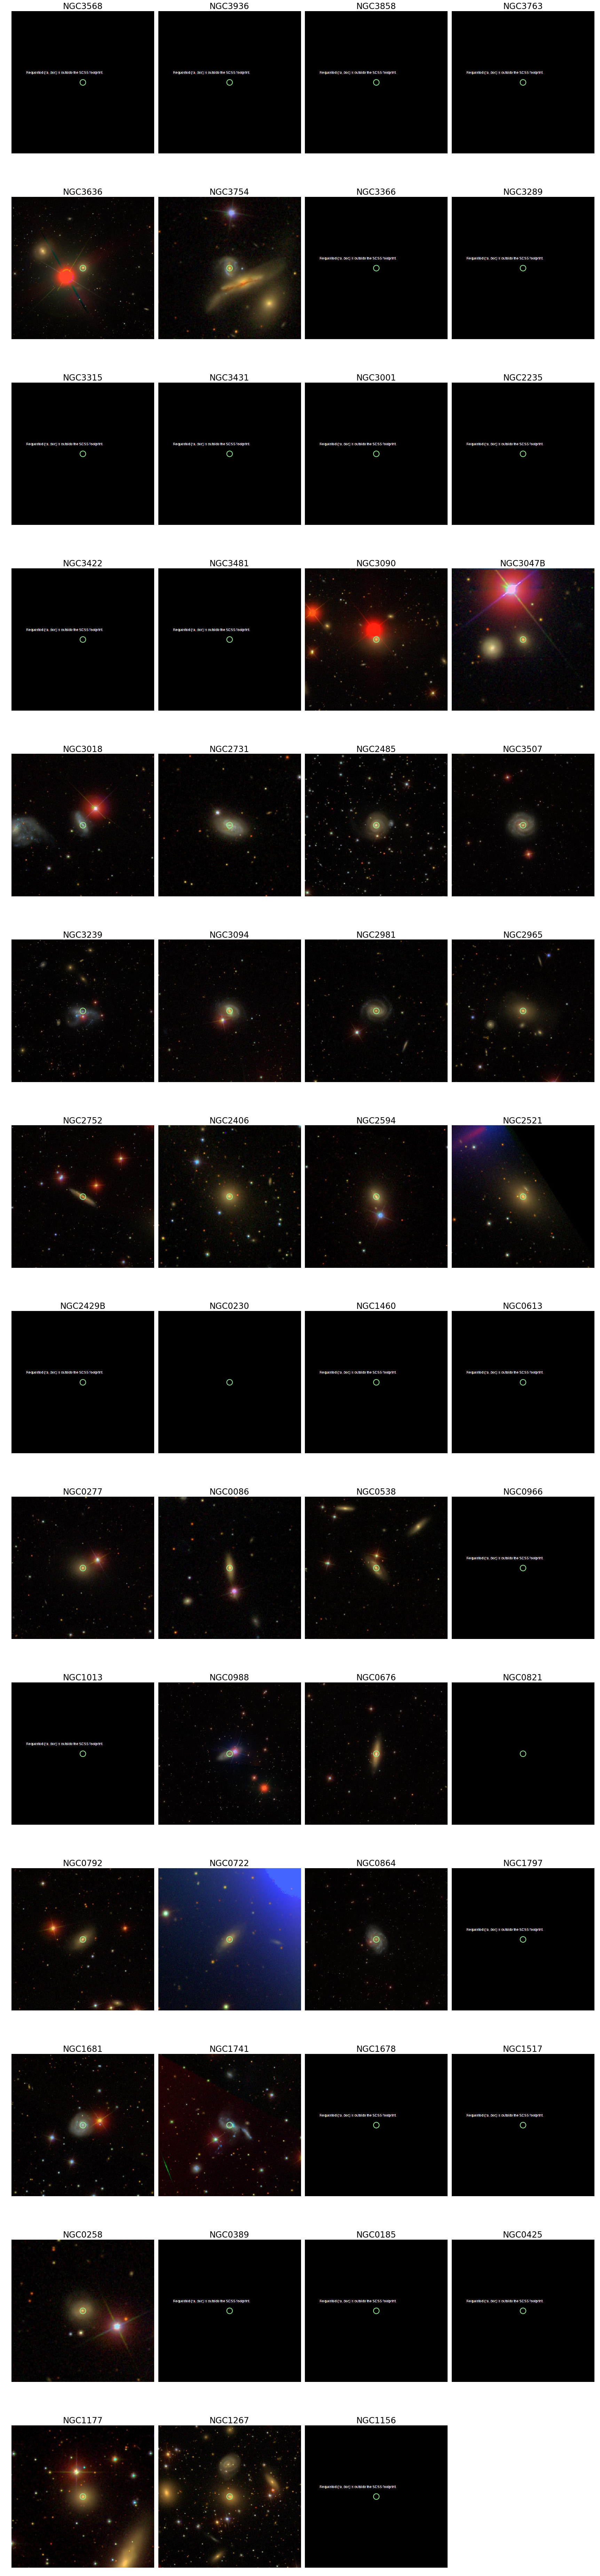

In [61]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

sample = check[check.galaxy.str.startswith(b'NGC', na = False)]

width = 500
height = 500
pixelsize = 0.5 #0.396
plt.figure(figsize=(30, 2.5*len(sample)))
subPlotNum = 1

for idx, gal in sample.iterrows():

    scale = (150*gal.d25)/pixelsize/width
    #scale = (8000*np.degrees(1*(1/3600)))/pixelsize/width
    url = "http://skyservice.pha.jhu.edu/DR14/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url += "&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url += "&height="+str(height)
    
    img = skimage.io.imread(url)
    
    ax = plt.subplot(np.ceil(len(sample)/4), 4, subPlotNum)
    
    subPlotNum += 1  
    plt.axis('off')
    plt.imshow(img)
    
    circ = Circle((250, 250), 10, facecolor='none', edgecolor='lightgreen', linewidth=2)
    ax.add_patch(circ)
        
    # show the object identifier (objId) above the image.
    plt.title(gal.galaxy.decode('utf-8'), fontsize=24)
    
    plt.subplots_adjust(wspace=0.03, hspace=0)

## Some snippets that may come in handy some day

In [8]:
#ramod = tycho.RA * cos(tycho.DEC)
#locations = np.array([ramod, tycho.DEC]).T
locations = np.array([tycho.RA, tycho.DEC]).T
tree = cKDTree(locations)

In [11]:
centers = np.array([galaxies.ra, galaxies.dec]).T

In [11]:
nearby = []
for gal in galaxies.itertuples():

    ra = gal.ra
    dec = gal.dec
    
    point = (ra, dec)
    #point = (ra * cos(dec), dec)
    near_list = tree.query_ball_point(point, r=50/3600)
    
    if len(near_list) > 0:
        keep = tycho.loc[tycho.index[near_list]]
        nearby.append([gal.Index, keep.index])
        
tocut = []
for ii in range(len(nearby)):
    tocut.append(nearby[ii][0])
    
check = galaxies.loc[tocut]
check.head()

galaxy   pgc objtype        ra        dec     type     bar    ring  \
4     b'UGC12897'    54    b'G'  0.158084  28.384472   b'Sab'  b'nan'  b'nan'   
54   b'PGC000538'   538    b'G'  1.745315  -6.955643  b'SABd'    b'B'  b'nan'   
122   b'UGC00160'  1128    b'G'  4.265475  34.499482    b'Sd'  b'nan'    b'R'   
147  b'PGC001294'  1294    b'G'  4.993215  19.402399    b'Sc'  b'nan'  b'nan'   
195  b'PGC001634'  1634    b'G'  6.572656  -4.492326   b'SBa'    b'B'  b'nan'   

    multiple compactness   ...     w4sigm  tmass_key  j_m_2mass  j_msig_2mass  \
4     b'nan'      b'nan'   ...      0.191  350118791     13.254         0.061   
54      b'M'      b'nan'   ...        NaN          0        NaN           NaN   
122   b'nan'      b'nan'   ...      0.000          0      0.000         0.000   
147   b'nan'      b'nan'   ...      0.000          0      0.000         0.000   
195   b'nan'      b'nan'   ...      0.043   82591692     14.890         0.161   

     h_m_2mass  h_msig_2mass  k_m_2mass  k_msig_2mass  inwise  groupid  
4       12.549          0.07     12.226         0.055    True        4  
54         NaN           NaN        NaN           NaN    True       55  
122      0.000          0.00      0.000         0.000   False      124  
147      0.000          0.00      0.000         0.000   False      149  
195     14.085          0.18     13.727         0.134    True      198  

[5 rows x 54 columns]

In [494]:
indices = []
groups = []
allinfo = []
for ii, stars in enumerate(nearby):
    if len(stars) > 0:
        indices.append(ii)
        groups.append(stars)
        allinfo.append([ii, stars])

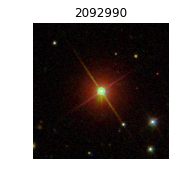

In [56]:
sample = problems[problems.index == 2092990]

width = 500
height = 500
pixelsize = 0.5 #0.396
plt.figure(figsize=(30, 2.5*len(sample)))
subPlotNum = 1

for idx, gal in sample.iterrows():

    #scale = (80*gal.d25)/pixelsize/width
    scale = 0.25
    url = "http://skyservice.pha.jhu.edu/DR14/ImgCutout/getjpeg.aspx?ra="+str(gal['RA'])
    url += "&dec="+str(gal['DEC'])+"&scale="""+str(scale)+"&width="+str(width)
    url += "&height="+str(height)
    
    img = skimage.io.imread(url)
    
    ax = plt.subplot(np.ceil(len(sample)/4), 4, subPlotNum)
    
    subPlotNum += 1  
    plt.axis('off')
    plt.imshow(img)
    
    circ = Circle((250, 250), 10, facecolor='none', edgecolor='lightgreen', linewidth=2)
    ax.add_patch(circ)
    
    #for ii, _ in enumerate(groups[idx]):
    #    obj = tycho.loc[groups[idx][ii]]
    #    radiff = gal.ra - obj.RA
    #    decdiff = gal.dec - obj.DEC
    #    circ2 = Circle((250-(radiff/scale)*cos(obj.DEC), 250+decdiff/scale), 10, 
    #                  facecolor='none', edgecolor='red', linewidth=2)
    #    ax.add_patch(circ2)
        
    # show the object identifier (objId) above the image.
    #plt.title(gal.galaxy.decode('utf-8'), fontsize=24)
    plt.title(idx)
    plt.subplots_adjust(wspace=0.03, hspace=0)

In [65]:
where = check[check.galaxy.str.startswith(b'NGC', na = False)]

In [66]:
[print(gg.decode('utf8'), rr, dd) for (gg, rr, dd) in zip(where.galaxy, where.ra, where.dec)]



NGC3568 167.7023535 -37.4478326
NGC3936 178.0857705 -26.9058623
NGC3858 176.298702 -9.3140093
NGC3763 174.125709 -9.8466667
NGC3636 170.1050355 -10.2820657
NGC3754 174.4788495 21.9855765
NGC3366 158.784975 -43.6921298
NGC3289 158.53092 -35.3233635
NGC3315 159.3300285 -27.1915712
NGC3431 162.8126655 -17.0079896
NGC3001 146.577768 -30.4374791
NGC2235 95.591916 -64.9340278
NGC3422 162.8221545 -12.4024033
NGC3481 164.859042 -7.5436389
NGC3090 150.126066 -2.9692812
NGC3047B 148.622907 -1.2880147
NGC3018 147.4226475 0.6211149
NGC2731 135.534999 8.3017041
NGC2485 119.202708 7.4779444
NGC3507 165.855792 18.1353333
NGC3239 156.2703045 17.1637013
NGC3094 150.358014 15.7699934
NGC2981 146.2356765 31.0977839
NGC2965 145.8297885 36.2477982
NGC2752 136.4297325 18.3399384
NGC2406 112.948917 18.2878056
NGC2594 126.821583 25.8789167
NGC2521 122.205792 57.7695833
NGC2429B 115.9659165 52.3484722
NGC0230 10.613328 -23.6288266
NGC1460 56.557209 -36.6963601
NGC0613 23.575806 -29.4184424
NGC0277 12.8218665 -

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [74]:
from IPython.display import IFrame
IFrame('cutouts.html', width=700, height=1000)